In [1]:
# Required imports
import holoviews
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Load the Data Into a Pandas DataFrame

In [20]:
# Read in the CSV file as a Pandas Dataframe
strokeinfo_df = pd.read_csv(Path("Resources/healthcare-dataset-stroke-data.csv"))

strokeinfo_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [21]:
#Split bmi into different bins following Less than 18.5, 18.5 - 24.9, 25.0 - 29.9, 30.0 or greater
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']





In [22]:
#Split the bmi column into those bins and add them as separate columns back into the strokeinfo_df dataset and drop the age column.

strokeinfo_df['bmi_bin'] = pd.cut(strokeinfo_df['bmi'], bins=bins, labels=labels)

#remove age column from new strokeinfo_df dataframe
strokeinfo_df = strokeinfo_df.drop(columns=['bmi'])
strokeinfo_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_bin
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,Normal


In [23]:
#Split age_bin by age_bin grouping and hot code the inclusion in each category
strokeinfo_df = pd.get_dummies(strokeinfo_df, columns=['bmi_bin'])
strokeinfo_df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_bin_Underweight,bmi_bin_Normal,bmi_bin_Overweight,bmi_bin_Obese
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,False,False,False,True
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,False,False,False,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,False,False,False,True
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,False,False,False,True
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,False,True,False,False


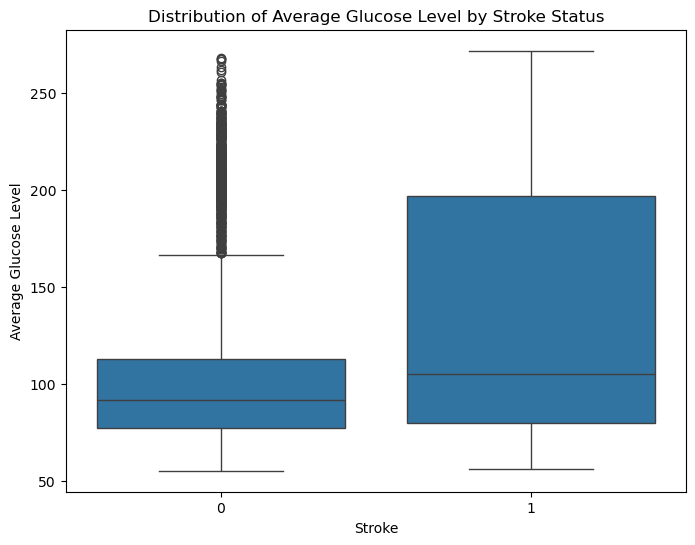

In [24]:
# @title Distribution of Average Glucose Level by Stroke Status

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=strokeinfo_df)
plt.title('Distribution of Average Glucose Level by Stroke Status')
plt.xlabel('Stroke')
_ = plt.ylabel('Average Glucose Level')

In [25]:
#drop rows with null values
strokeinfo_df = strokeinfo_df.dropna()

#copy strokeinfo_df into new dataframe
strokeinfo_drop_df = strokeinfo_df.copy()
strokeinfo_drop_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_bin_Underweight,bmi_bin_Normal,bmi_bin_Overweight,bmi_bin_Obese
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,False,False,False,True
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,False,False,False,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,False,False,False,True
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,False,False,False,True
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,False,True,False,False


In [26]:
# Get Dummies to transfrom column with encoding function
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
existing_categorical_cols = [col for col in categorical_cols if col in strokeinfo_drop_df.columns]
# Apply get_dummies
strokeinfo_drop_df = pd.get_dummies(strokeinfo_drop_df, columns=existing_categorical_cols, drop_first=True)

In [27]:
strokeinfo_drop_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_bin_Underweight,bmi_bin_Normal,bmi_bin_Overweight,bmi_bin_Obese,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,1,False,False,False,True,...,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,1,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,1,False,False,False,True,...,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,1,False,False,False,True,...,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False


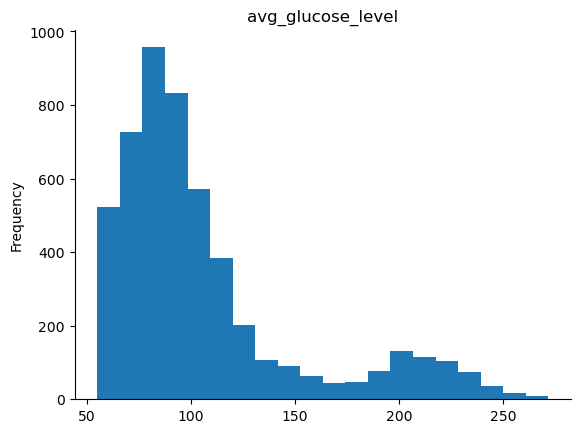

In [28]:
# @title avg_glucose_level

from matplotlib import pyplot as plt
strokeinfo_drop_df['avg_glucose_level'].plot(kind='hist', bins=20, title='avg_glucose_level')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
# Scale avg_glucose_level
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
strokeinfo_drop_df['avg_glucose_level'] = scaler.fit_transform(strokeinfo_drop_df[['avg_glucose_level']])
strokeinfo_drop_df.head()

#change index to id column
strokeinfo_drop_df.set_index('id', inplace=True)




In [30]:
#copy strokeinfo_drop_df into new dataframe strokeinfo2_df
strokeinfo2_df = strokeinfo_drop_df.copy()
strokeinfo2_df.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_bin_Underweight,bmi_bin_Normal,bmi_bin_Overweight,bmi_bin_Obese,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,2.706375,1,False,False,False,True,True,False,True,False,True,False,False,True,True,False,False
51676,61.0,0,0,2.121559,1,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
31112,80.0,0,1,-0.005028,1,False,False,False,True,True,False,True,False,True,False,False,False,False,True,False
60182,49.0,0,0,1.437358,1,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True
1665,79.0,1,0,1.501184,1,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False


In [31]:
#split the strokeinfo2_df dataset into x_train and x_test and y_train and y_test
x_train, x_test, y_train, y_test = train_test_split(strokeinfo2_df.drop('stroke', axis=1), strokeinfo2_df['stroke'], test_size=0.2, random_state=42)

In [32]:
#pass the x_train and y_train data through smoteenn to fix imbalance
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x_train, y_train)
x_resampled.describe()

,age,hypertension,heart_disease,avg_glucose_level
count,6765.000000,6765.000000,6765.000000,6765.000000
mean,54.440741,0.065484,0.047894,0.270161
std,22.588695,0.247396,0.213557,1.153825
min,0.160000,0.000000,0.000000,-1.126958
25%,40.000000,0.000000,0.000000,-0.567981
50%,58.877120,0.000000,0.000000,-0.174864
75%,74.133210,0.000000,0.000000,0.817205
max,82.000000,1.000000,1.000000,3.657145


## Use PCA to reduce the number of factors

In [33]:
# Import the PCA module
from sklearn.decomposition import PCA

In [34]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=4)

In [35]:
# Fit the x_train data into PCA model
X_train_pca = pca.fit_transform(x_resampled)

# Review the first 5 rows of list data
X_train_pca[:5]

array([[ 24.55700026,  -0.52933508,  -0.60921423,  -0.6868122 ],
       [  7.54918264,  -0.6801165 ,   0.14935704,   0.78152447],
       [-33.46084281,  -0.78581078,   0.76480669,   0.84280747],
       [-23.44428827,  -0.63119965,  -0.44059256,   0.76242944],
       [-23.46934562,  -1.13310717,   0.60607322,  -0.15816316]])

In [36]:
X_test_pca = pca.transform(x_test)

## PCA explained variance ratio

In [37]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_ 


array([9.93014008e-01, 2.50342682e-03, 6.43040637e-04, 6.12562880e-04])

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_pca, y_resampled)  # Train the model on the PCA-transformed training data

# Evaluate the model on the PCA-transformed test data
y_pred = model.predict(X_test_pca)
#Calculate accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.6917808219178082
Precision: 0.15151515151515152
Recall: 0.8870967741935484


In [39]:
#print confusion matrix on prediction model
confusion_matrix(y_test, y_pred)
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[652 308]
 [  7  55]]


In [40]:
#run classification report
classification_report(y_test, y_pred)
cr1 = classification_report(y_test, y_pred)
print(cr1)

              precision    recall  f1-score   support

           0       0.99      0.68      0.81       960
           1       0.15      0.89      0.26        62

    accuracy                           0.69      1022
   macro avg       0.57      0.78      0.53      1022
weighted avg       0.94      0.69      0.77      1022



## Dropping environmental variables to find better fit of model

In [41]:
#Copy new dataset from strokeinfo2_df but drop environmental variable columns: gender_Other, ever_married_Yes, work_type_Never_worked, work_type_Private, work_type_Self-employed, work_type_children, Residence_type_Urban
strokeinfo3_df = strokeinfo2_df.drop(columns=['gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban'])
strokeinfo3_df.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_bin_Underweight,bmi_bin_Normal,bmi_bin_Overweight,bmi_bin_Obese,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,
9046,67.0,0,1,2.706375,1,False,False,False,True,True,True,False,False
51676,61.0,0,0,2.121559,1,False,False,False,False,False,False,True,False
31112,80.0,0,1,-0.005028,1,False,False,False,True,True,False,True,False
60182,49.0,0,0,1.437358,1,False,False,False,True,False,False,False,True
1665,79.0,1,0,1.501184,1,False,True,False,False,False,False,True,False


In [42]:
#split the strokeinfo2_df dataset into x_train and x_test and y_train and y_test
x_train2, x_test2, y_train2, y_test2 = train_test_split(strokeinfo3_df.drop('stroke', axis=1), strokeinfo3_df['stroke'], test_size=0.2, random_state=42)

In [43]:
#pass the x_train and y_train data through smoteenn to fix imbalance
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
x_resampled2, y_resampled2 = smote_enn.fit_resample(x_train2, y_train2)
x_resampled.describe()

,age,hypertension,heart_disease,avg_glucose_level
count,6765.000000,6765.000000,6765.000000,6765.000000
mean,54.440741,0.065484,0.047894,0.270161
std,22.588695,0.247396,0.213557,1.153825
min,0.160000,0.000000,0.000000,-1.126958
25%,40.000000,0.000000,0.000000,-0.567981
50%,58.877120,0.000000,0.000000,-0.174864
75%,74.133210,0.000000,0.000000,0.817205
max,82.000000,1.000000,1.000000,3.657145


In [44]:
# Import the PCA module
from sklearn.decomposition import PCA

In [45]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=4)

In [46]:
# Fit the x_train data into PCA model
X_train_pca2 = pca.fit_transform(x_resampled2)

# Review the first 5 rows of list data
X_train_pca2[:5]

array([[  7.43876893,  -0.7051386 ,   0.13723095,   0.74988395],
       [-33.5604961 ,  -0.7876377 ,   0.79008053,   0.74564502],
       [-23.55543818,  -0.62381675,  -0.80682727,   0.9335854 ],
       [-23.56716209,  -1.1369725 ,   0.7596652 ,  -0.26030203],
       [  8.43775145,  -0.94437539,  -0.11255298,  -0.55727502]])

In [47]:
X_test_pca2 = pca.transform(x_test2)

In [48]:
#add a prediction group for sample data points based on pca and plot the data points of the principal components on stroke
import plotly.express as px
stroke_pca_df = pd.DataFrame(
    data=X_train_pca2, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4"]
)
stroke_pca_df["stroke"] = y_resampled2
fig = px.scatter_3d(stroke_pca_df, # Changed stroke_pca to stroke_pca_df
    x="principal component 1",
    y="principal component 2",
    z="principal component 3",
    color="stroke",
    symbol="stroke",
    width=800,
)
fig


In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_pca2, y_resampled2)  # Train the model on the PCA-transformed training data

# Evaluate the model on the PCA-transformed test data
y_pred2 = model.predict(X_test_pca2)
#Calculate accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2)
recall2 = recall_score(y_test2, y_pred2)

In [50]:
print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")

Accuracy: 0.700587084148728
Precision: 0.1534090909090909
Recall: 0.8709677419354839


In [51]:
#print confusion matrix on prediction model
confusion_matrix(y_test2, y_pred2)
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

[[662 298]
 [  8  54]]


In [52]:
#print normalized confusion matrix
confusion_matrix(y_test2, y_pred2, normalize='true')
cmn2 = confusion_matrix(y_test2, y_pred2, normalize='true')
print(cmn2)


[[0.68958333 0.31041667]
 [0.12903226 0.87096774]]


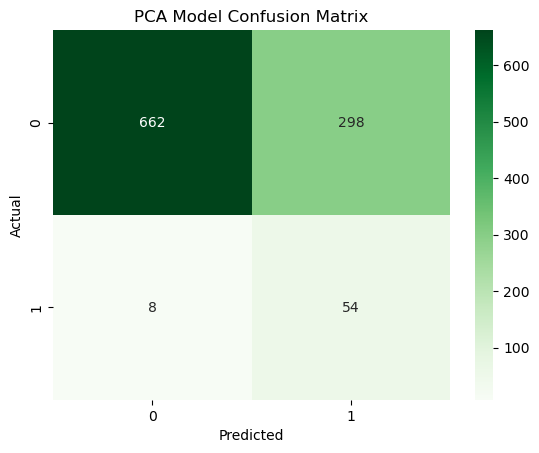

In [53]:
#make a chart of the confusion matrix in seaborn with the title "PCA Model Confusion Matrix"
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, fmt='d', cmap='Greens')
plt.title('PCA Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


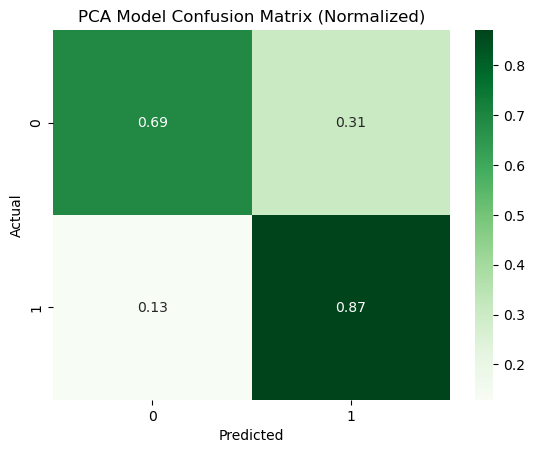

In [54]:
#make a chart of the normalized confusion matrix in seaborn with the title "PCA Model Confusion Matrix (Normalized)"
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test2, y_pred2, normalize='true'), annot=True, fmt='.2f', cmap='Greens')
plt.title('PCA Model Confusion Matrix (Normalized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
#run classification report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81       960
           1       0.15      0.87      0.26        62

    accuracy                           0.70      1022
   macro avg       0.57      0.78      0.54      1022
weighted avg       0.94      0.70      0.78      1022



In [56]:
#map correlation coefficients of stroke_pca_df as barchart
import matplotlib.pyplot as plt
stroke_pca_df.corr().style.background_gradient(cmap='coolwarm')


,principal component 1,principal component 2,principal component 3,principal component 4,stroke
principal component 1,1.000000,-0.000000,0.000000,-0.000000,0.686483
principal component 2,-0.000000,1.000000,0.000000,0.000000,0.151724
principal component 3,0.000000,0.000000,1.000000,0.000000,-0.088938
principal component 4,-0.000000,0.000000,0.000000,1.000000,-0.018868
stroke,0.686483,0.151724,-0.088938,-0.018868,1.000000


In [57]:
##add a prediction group for sample data points based on pca and plot the data points of the principal components on stroke using only principal component 1 and principal component 2
import plotly.express as px
stroke_pca_df = pd.DataFrame(
    data=X_train_pca2, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4"]
)
stroke_pca_df["stroke"] = y_resampled2
fig = px.scatter(stroke_pca_df, # Changed stroke_pca to stroke_pca_df
    x="principal component 1",
    y="principal component 2",
                 color="stroke",
    symbol="stroke",
    width=800,
)
fig

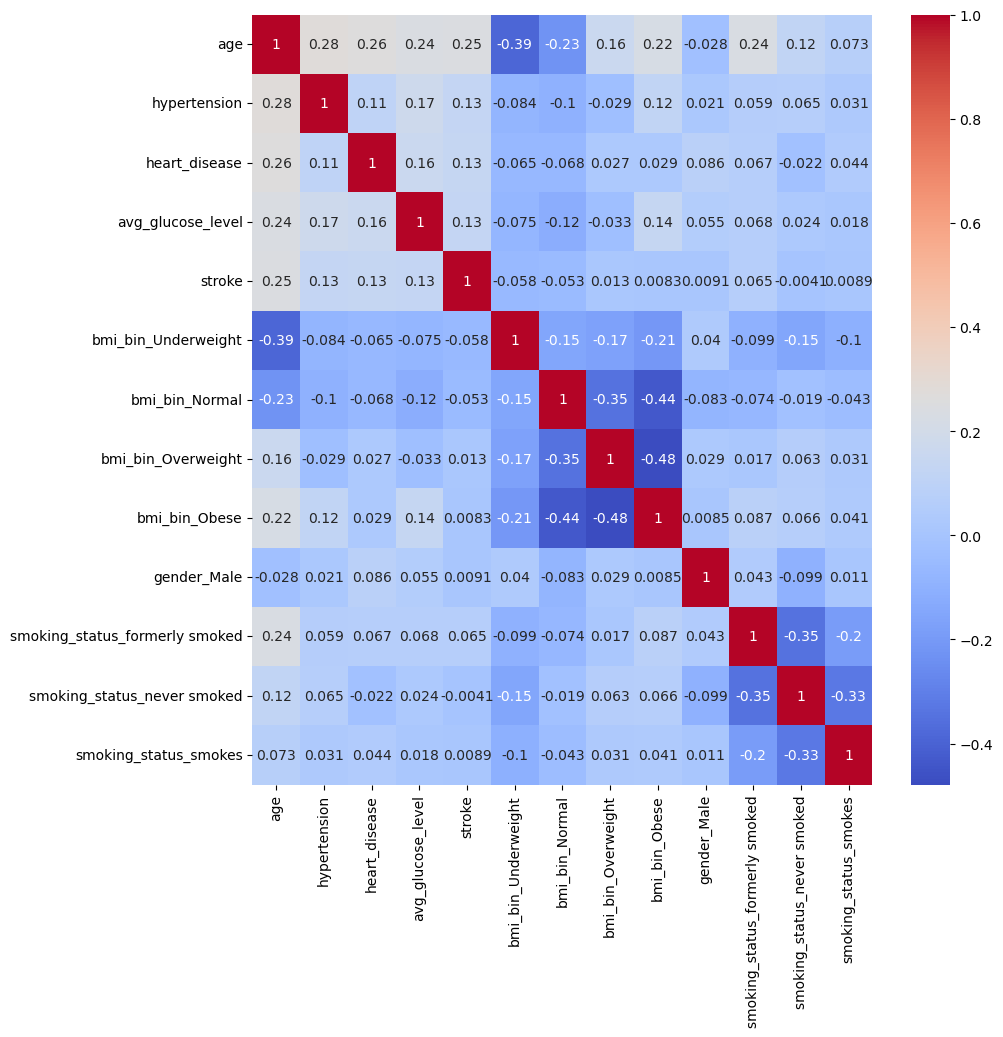

In [58]:
#create correlation coefficient heatmap for ypred2 with a larger area
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(strokeinfo3_df.corr(), annot=True, cmap='coolwarm')
plt.show()
